In [1]:
import os
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# 预设值
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None  # 展示所有列

In [3]:
# 初始数据
RAW_TRAIN = './data/serverless/train.csv'

# 1. 加载数据

In [4]:
# 加载原始数据
train_df = pd.read_csv(RAW_TRAIN)
train = train_df.sort_values(by=['QUEUE_ID', 'DOTTING_TIME']).reset_index(drop=True)

In [6]:
display(train_df)

,QUEUE_ID,CU,STATUS,QUEUE_TYPE,PLATFORM,CPU_USAGE,MEM_USAGE,LAUNCHING_JOB_NUMS,RUNNING_JOB_NUMS,SUCCEED_JOB_NUMS,CANCELLED_JOB_NUMS,FAILED_JOB_NUMS,DOTTING_TIME,RESOURCE_TYPE,DISK_USAGE
0,298,16,available,sql,x86_64,0,0,0,0,4,0,0,1582548540000,NaN,NaN
1,298,16,available,sql,x86_64,0,0,0,0,4,0,0,1582548840000,NaN,NaN
2,21671,256,available,sql,x86_64,0,0,0,0,0,0,1,1582549500000,NaN,NaN
3,21671,256,available,sql,x86_64,0,0,0,0,4,0,0,1582549500000,NaN,NaN
4,297,16,available,sql,x86_64,0,0,0,0,7,0,0,1582549500000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501725,87139,16,available,general,x86_64,3,36,0,0,0,0,0,1599867000000,vm,26.0
501726,87139,16,available,general,x86_64,2,36,0,0,0,0,0,1599867420000,vm,26.0
501727,87139,16,available,general,x86_64,3,36,0,0,0,0,0,1599867840000,vm,26.0
501728,87139,16,available,general,x86_64,2,36,0,0,0,0,0,1599868260000,vm,26.0


# 2. 数据探查

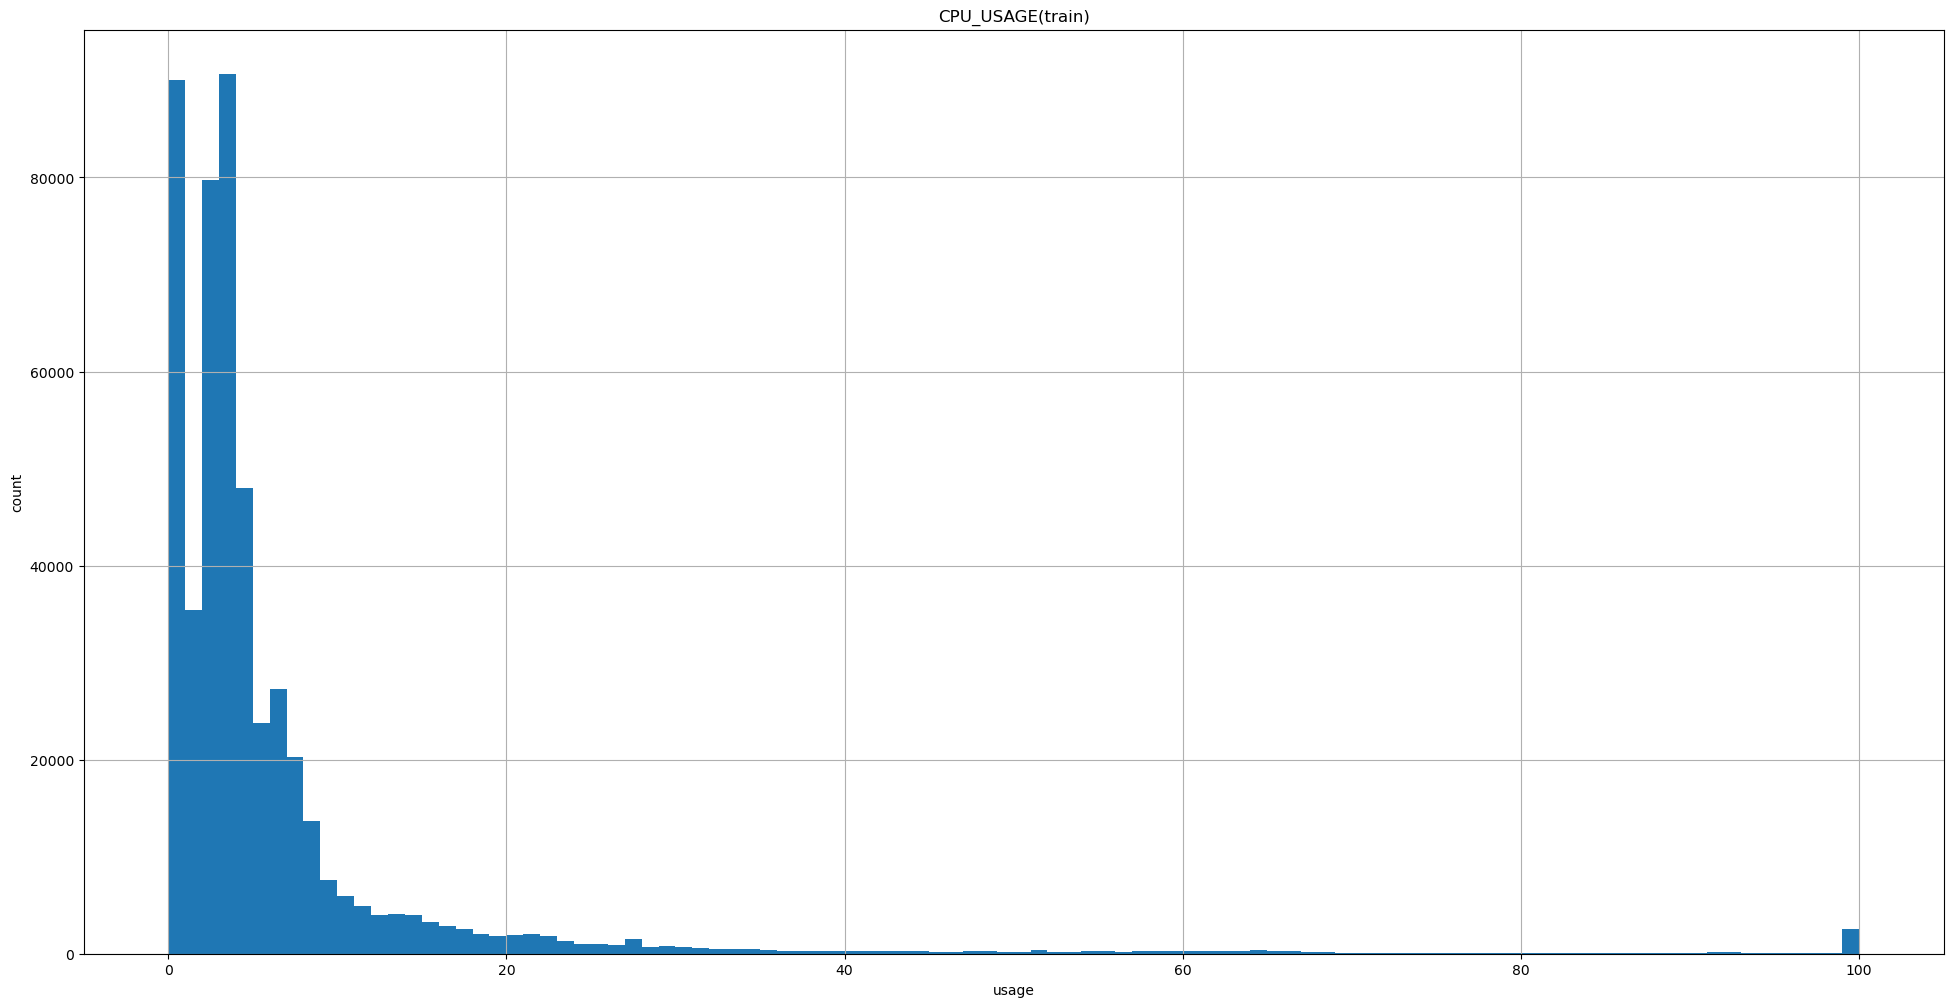

In [6]:
# CPU_USAGE分布图
train_cpu_hist = train_df['CPU_USAGE'].sort_index()

plt.figure(figsize=(24, 12))
plt.title('CPU_USAGE(train)')
plt.ylabel('count')
plt.xlabel('usage')
plt.grid(True)
plt.hist(train_cpu_hist, bins=100)
# plt.legend()  # 显示图例
plt.show()

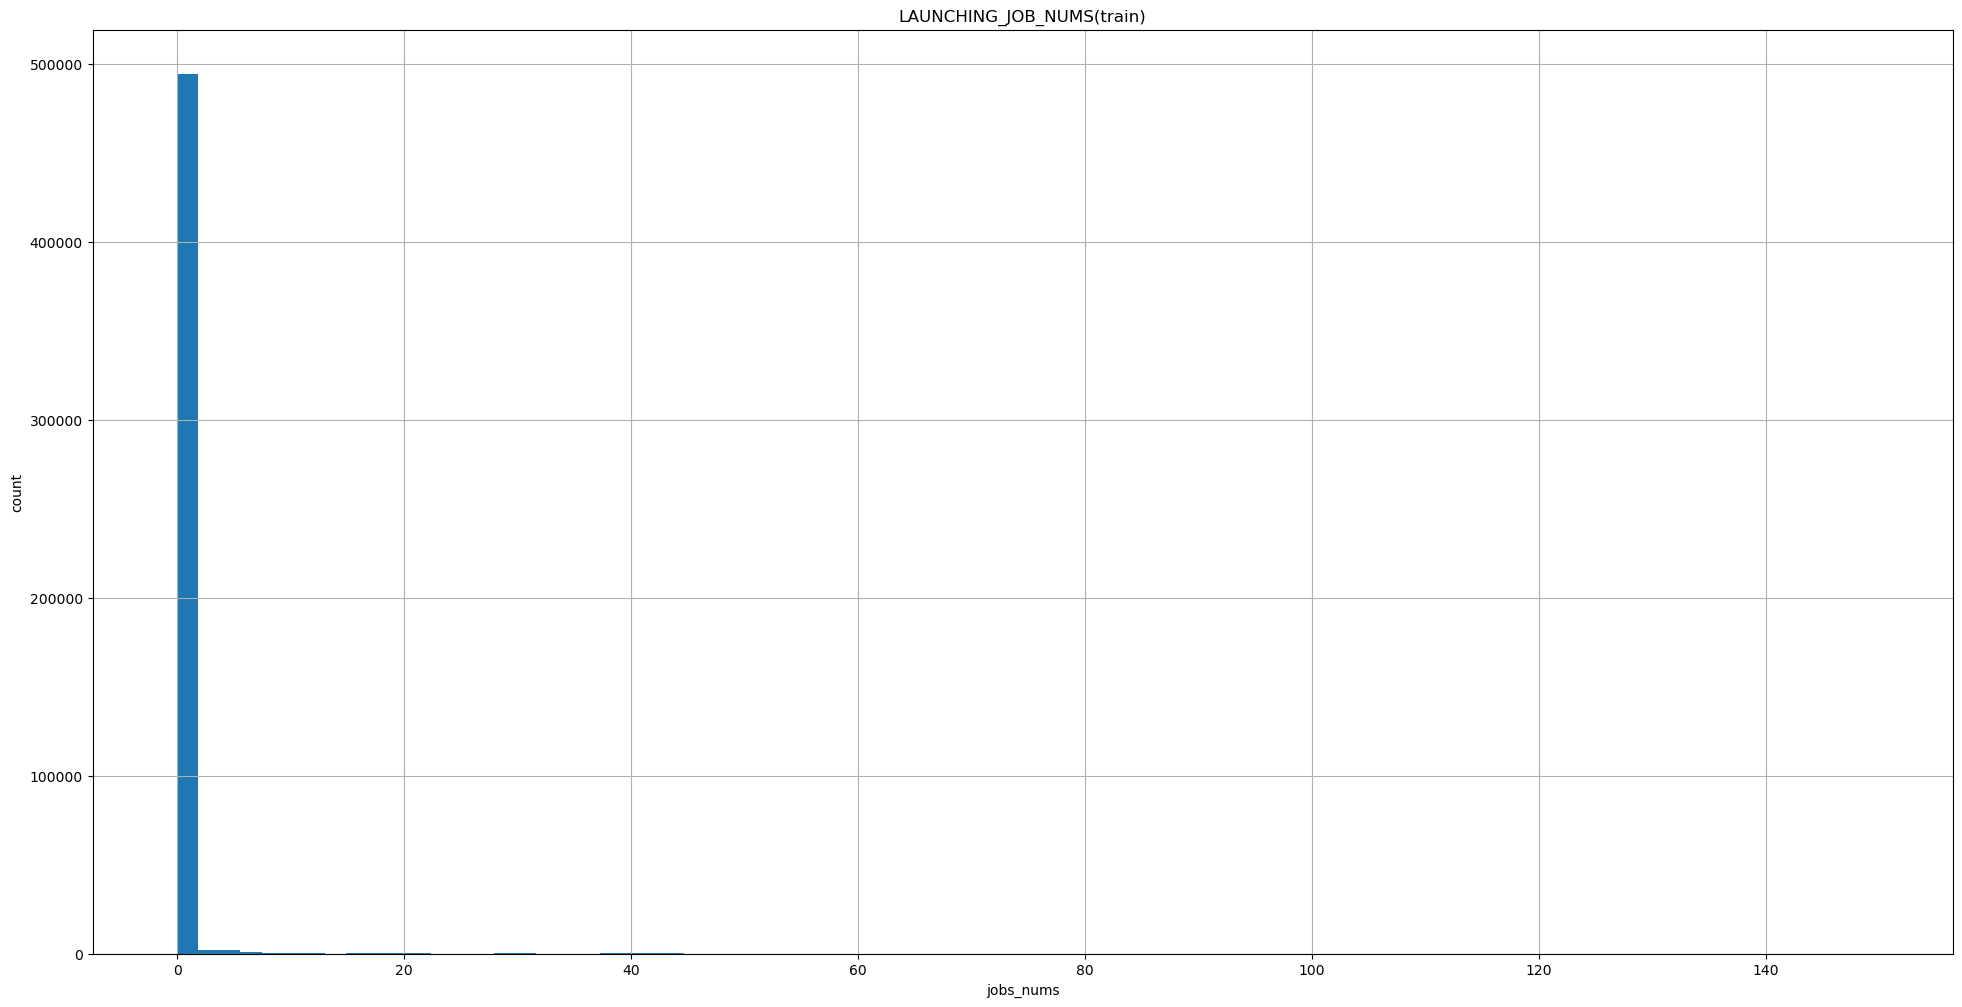

In [7]:
# LAUNCHING_JOB_NUMS分布图
train_jobs_hist = train_df['LAUNCHING_JOB_NUMS'].sort_index()

plt.figure(figsize=(24, 12))
plt.title('LAUNCHING_JOB_NUMS(train)')
plt.ylabel('count')
plt.xlabel('jobs_nums')
plt.grid(True)
plt.hist(train_jobs_hist, bins=80)
# plt.legend()  # 显示图例
plt.show()

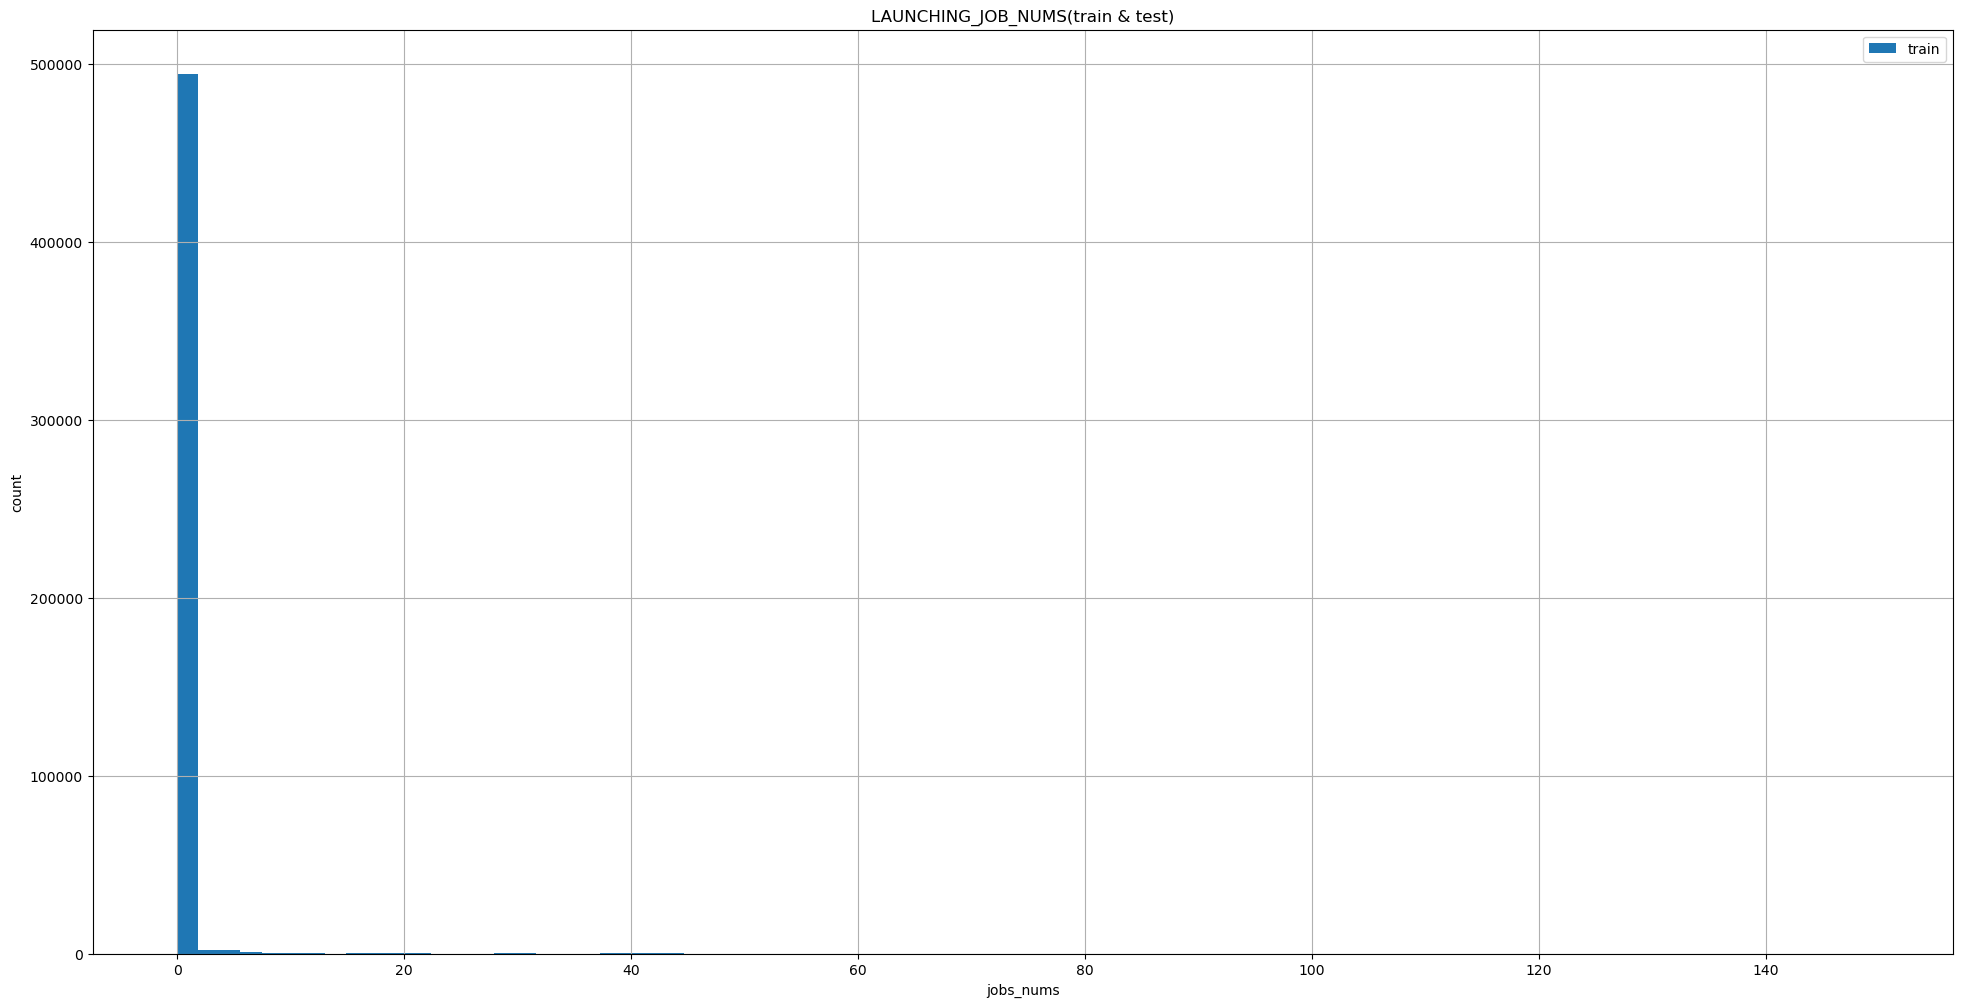

In [10]:
# LAUNCHING_JOB_NUMS分布图
train_jobs_hist = train_df['LAUNCHING_JOB_NUMS'].sort_index()

plt.figure(figsize=(24, 12))
plt.title('LAUNCHING_JOB_NUMS(train & test)')
plt.ylabel('count')
plt.xlabel('jobs_nums')
plt.grid(True)
plt.hist(train_jobs_hist, bins=80, label='train')
plt.legend()  # 显示图例
plt.show()

,QUEUE_ID,CU,STATUS,QUEUE_TYPE,PLATFORM,CPU_USAGE,MEM_USAGE,LAUNCHING_JOB_NUMS,RUNNING_JOB_NUMS,SUCCEED_JOB_NUMS,CANCELLED_JOB_NUMS,FAILED_JOB_NUMS,DOTTING_TIME,RESOURCE_TYPE,DISK_USAGE
128937,2,16,available,sql,x86_64,3,54,0,0,0,0,0,1590683100000,vm,20.0
128954,2,16,available,sql,x86_64,2,54,0,0,0,0,0,1590683400000,vm,20.0
128957,2,16,available,sql,x86_64,7,54,0,0,0,0,0,1590683700000,vm,20.0
128974,2,16,available,sql,x86_64,4,54,0,0,0,0,0,1590684000000,vm,20.0
128991,2,16,available,sql,x86_64,5,54,0,0,0,0,0,1590684120000,vm,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432140,2,16,available,sql,x86_64,4,48,0,0,0,0,0,1596584160000,vm,26.0
432159,2,16,available,sql,x86_64,6,48,0,0,0,0,0,1596584460000,vm,26.0
432166,2,16,available,sql,x86_64,4,48,0,0,0,0,0,1596584760000,vm,26.0
432185,2,16,available,sql,x86_64,3,48,0,0,0,0,0,1596585060000,vm,26.0


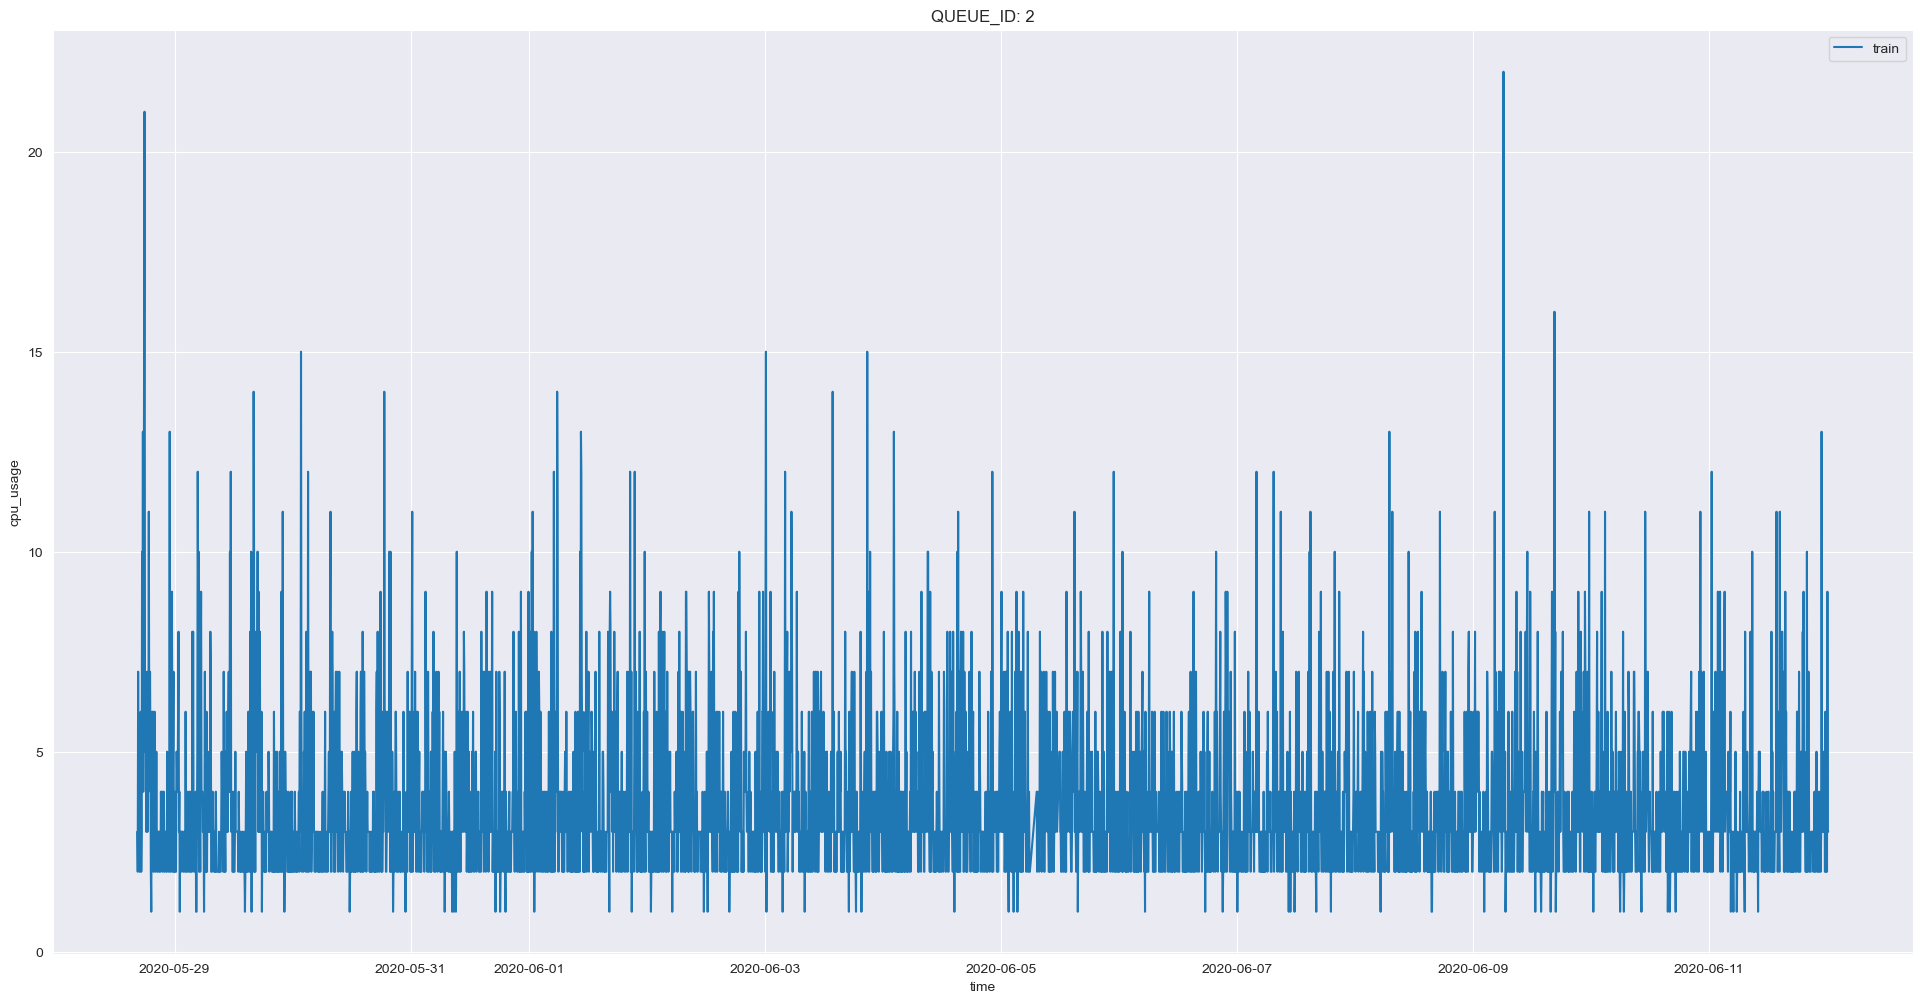

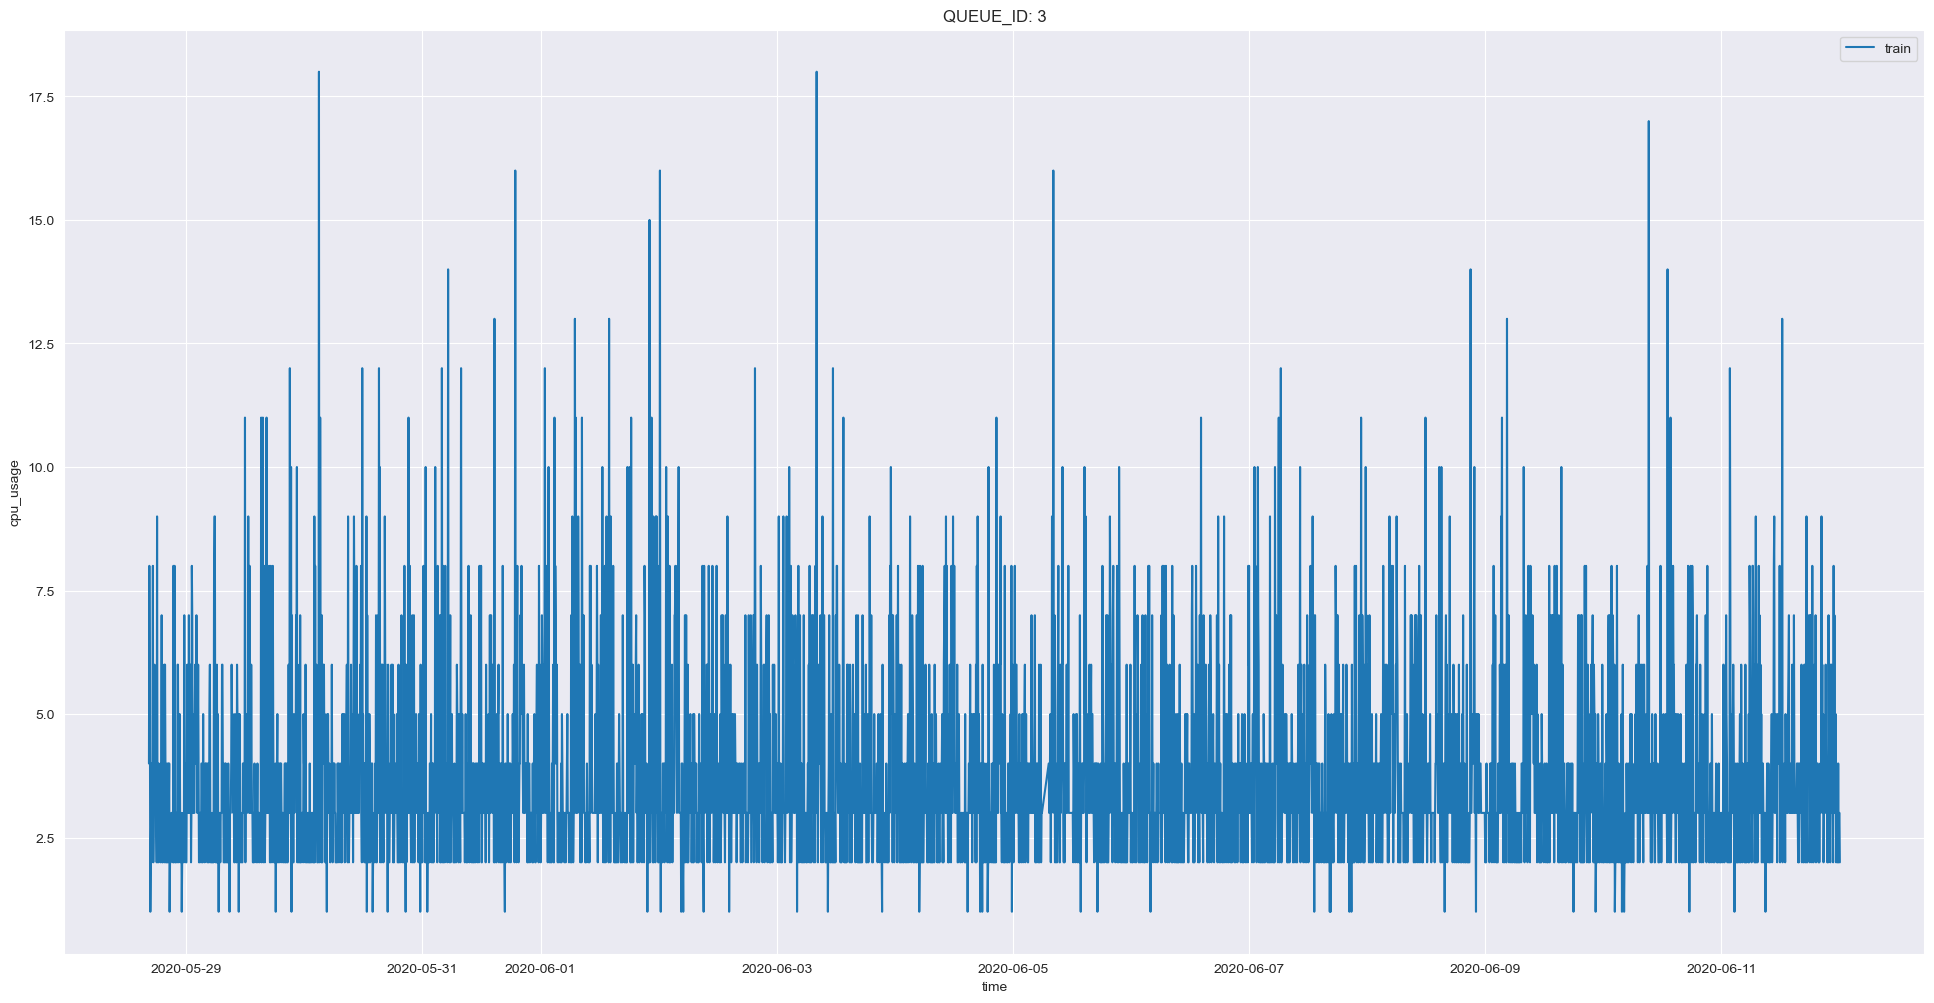

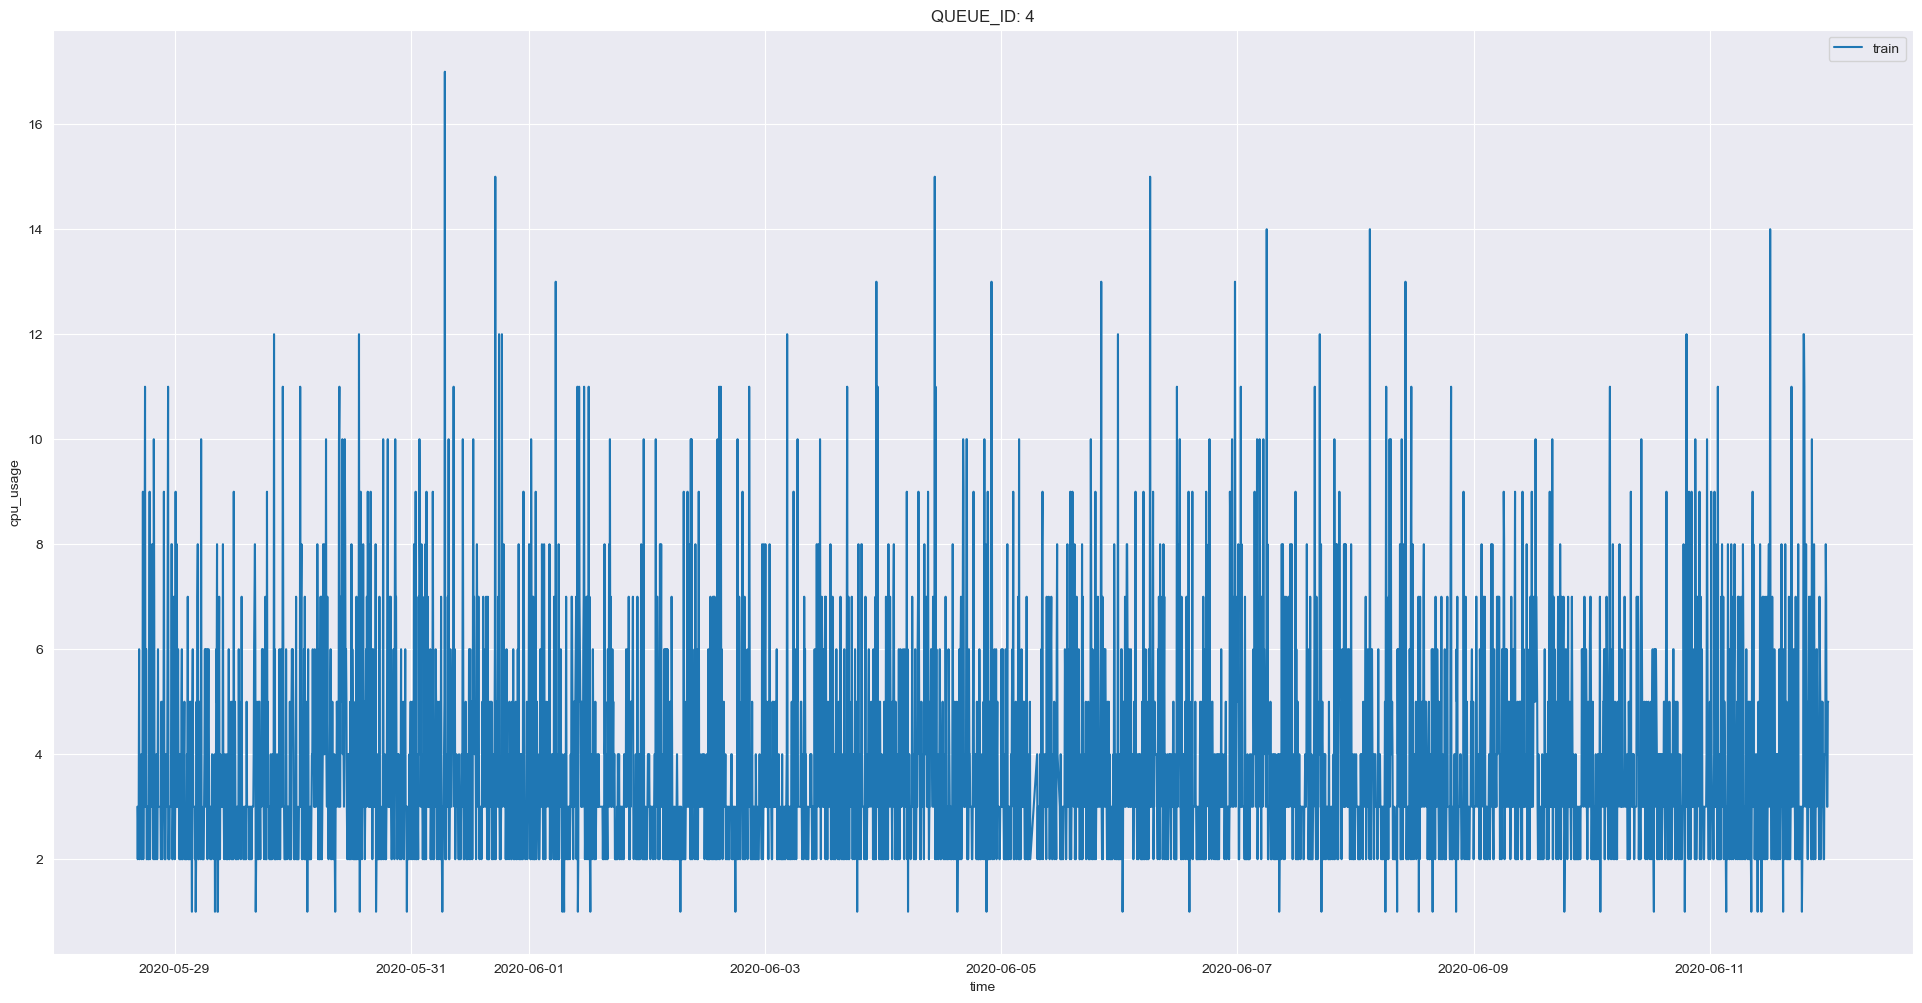

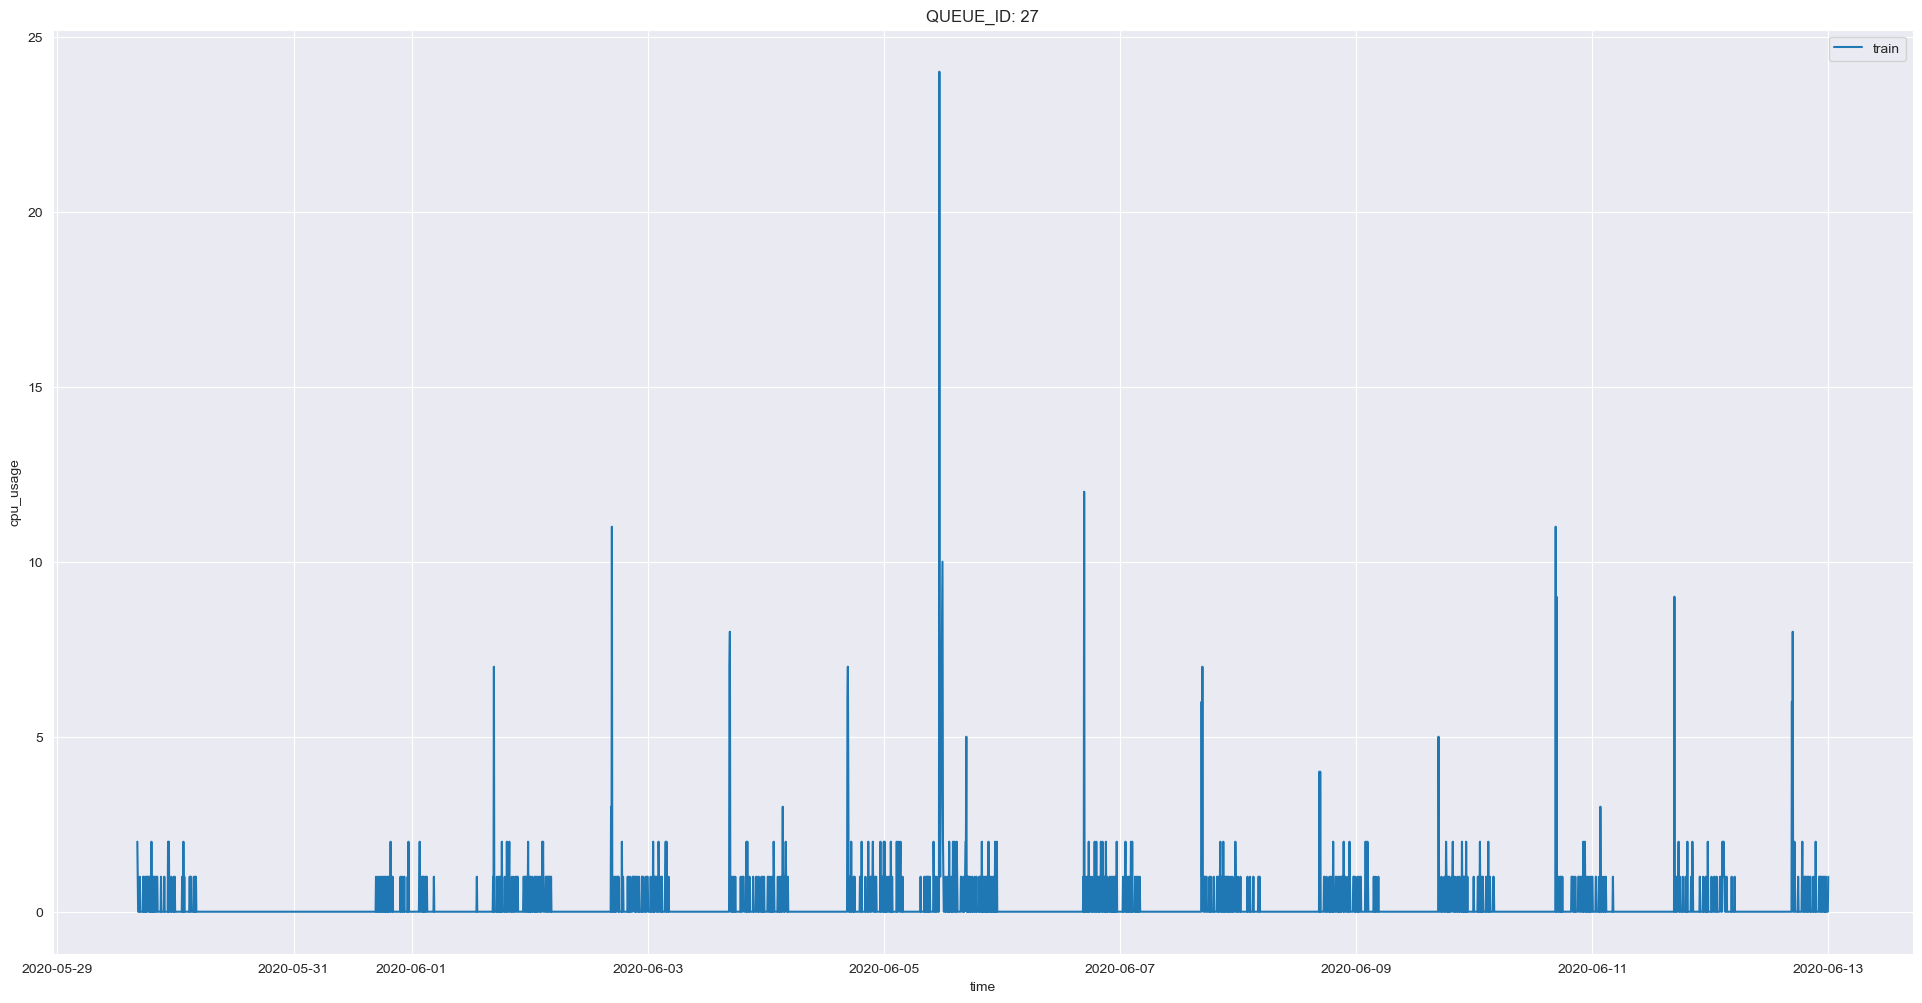

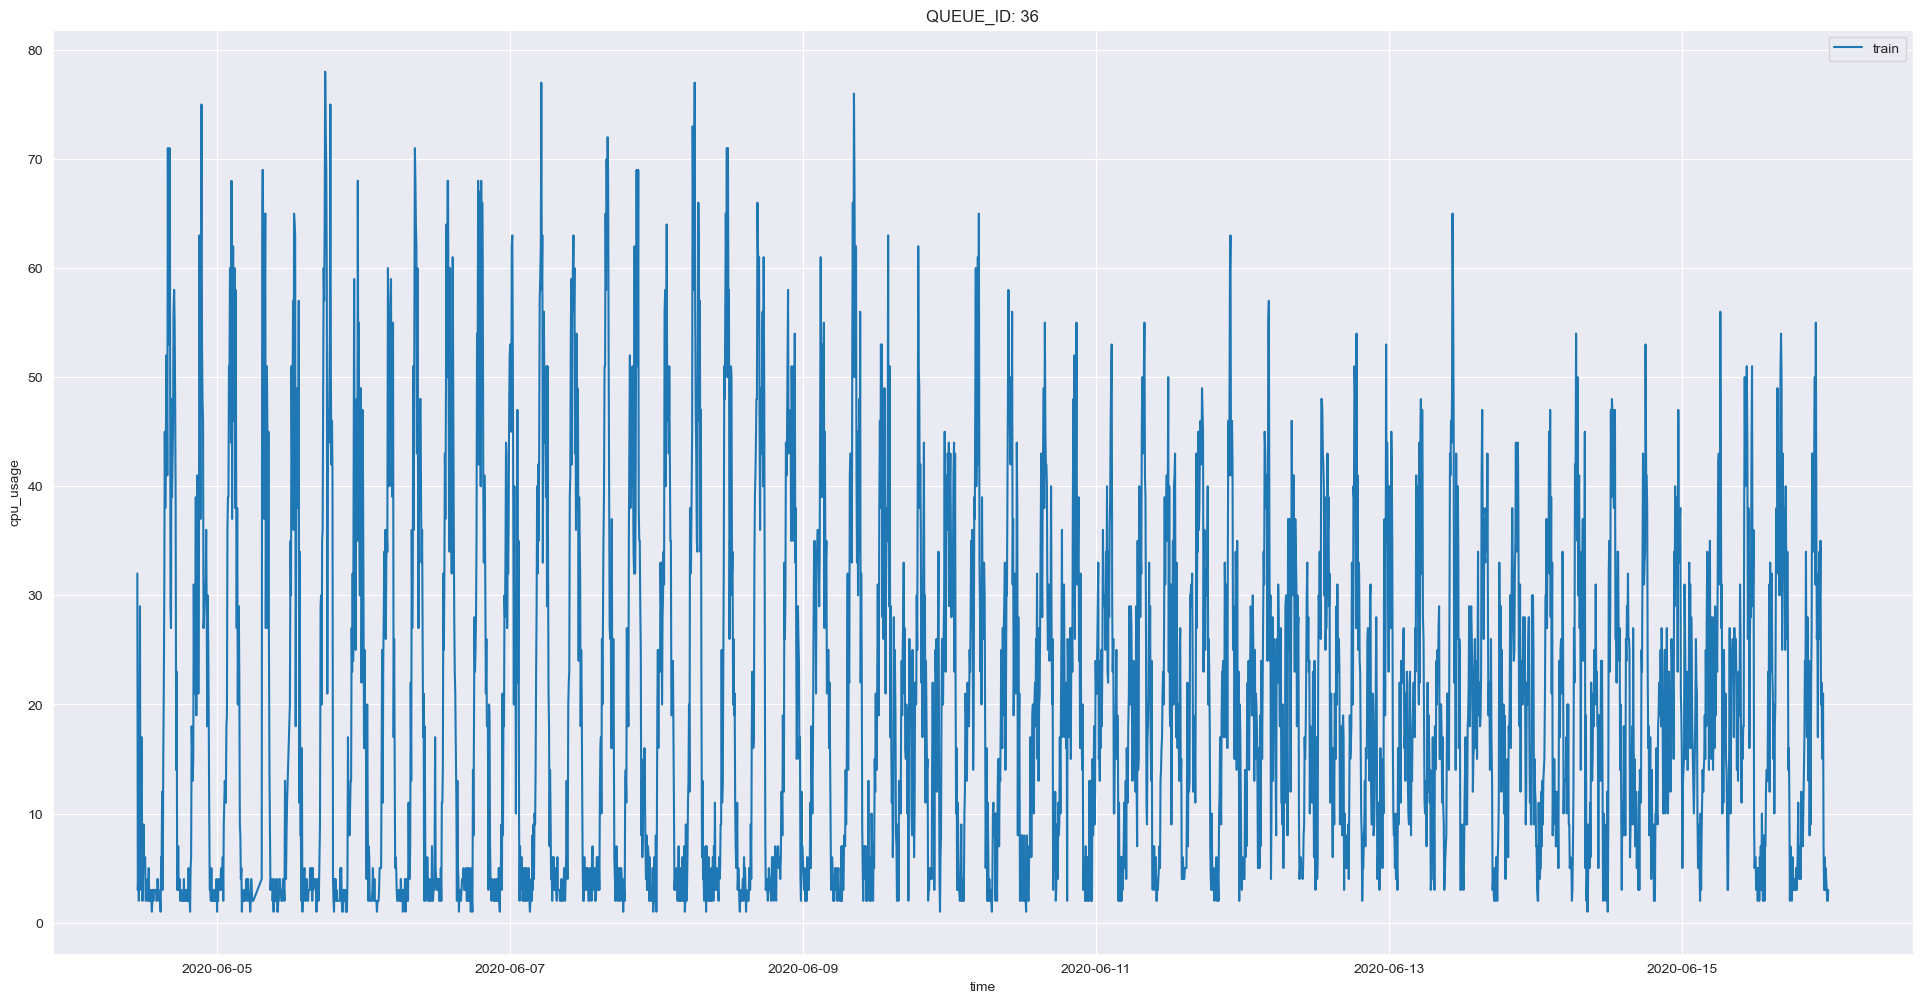

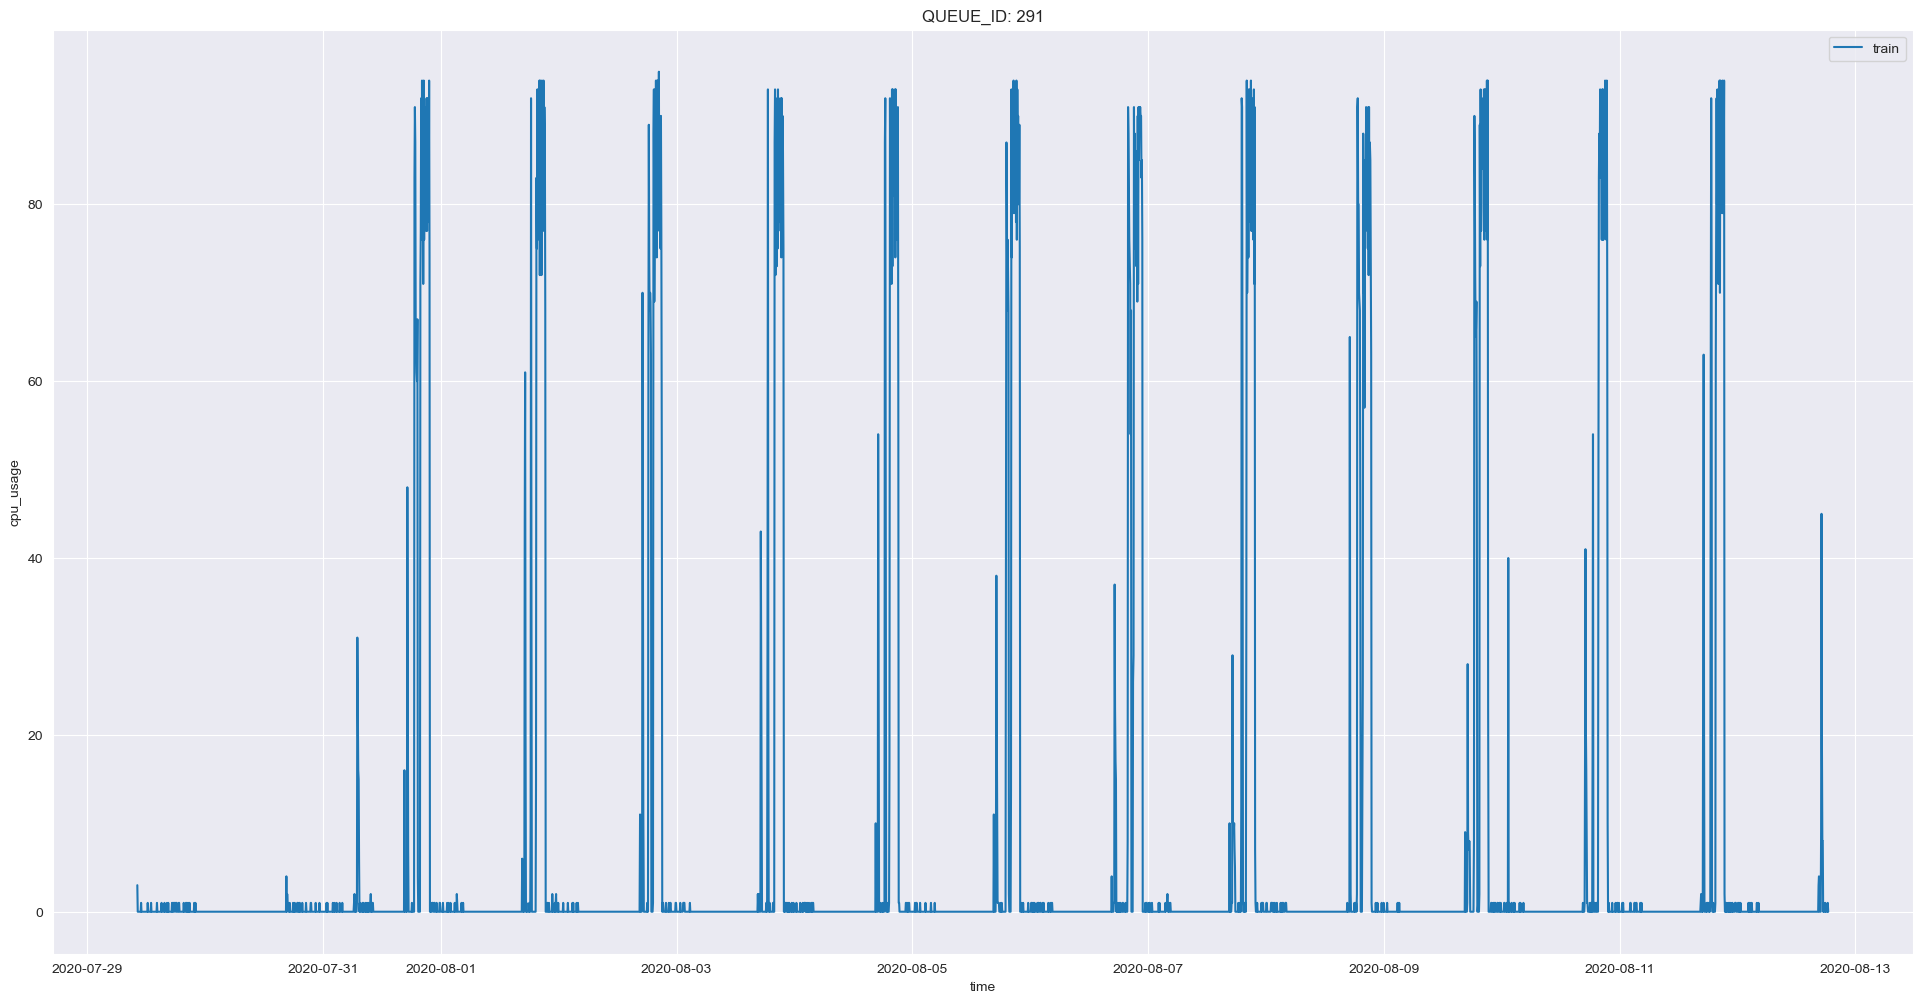

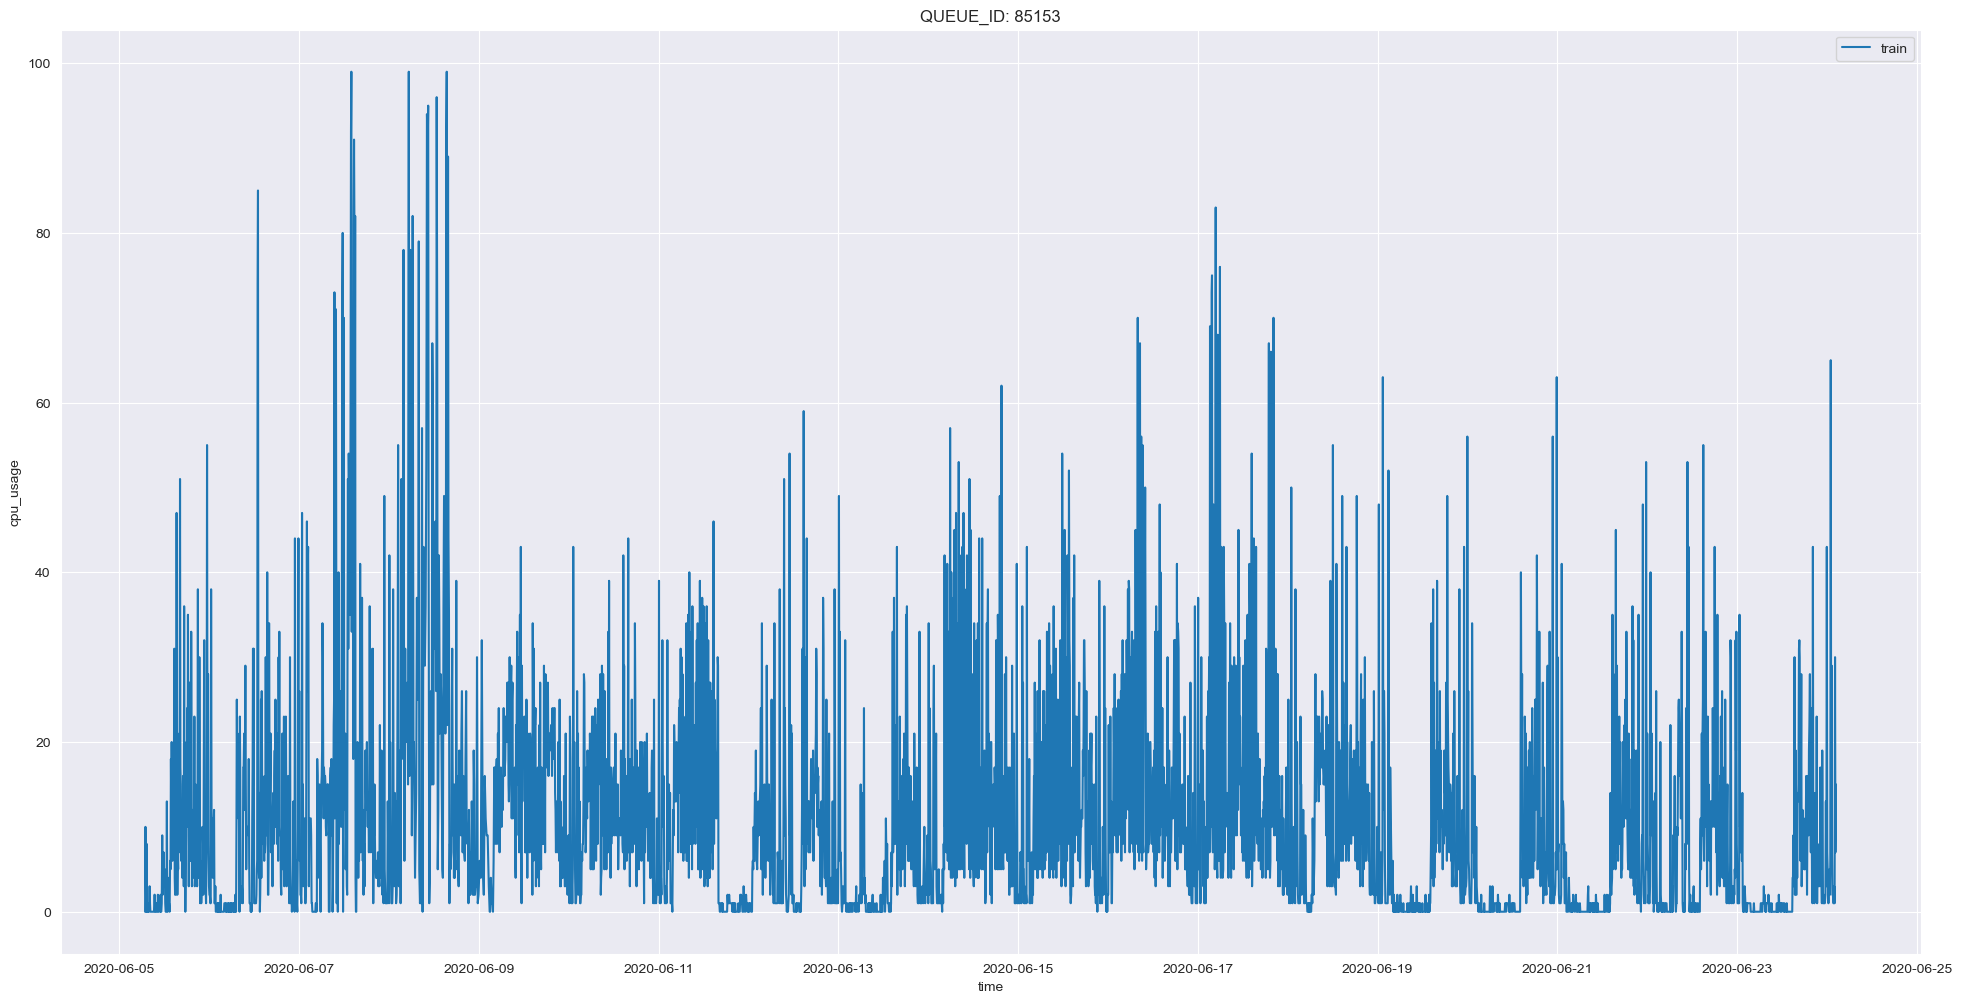

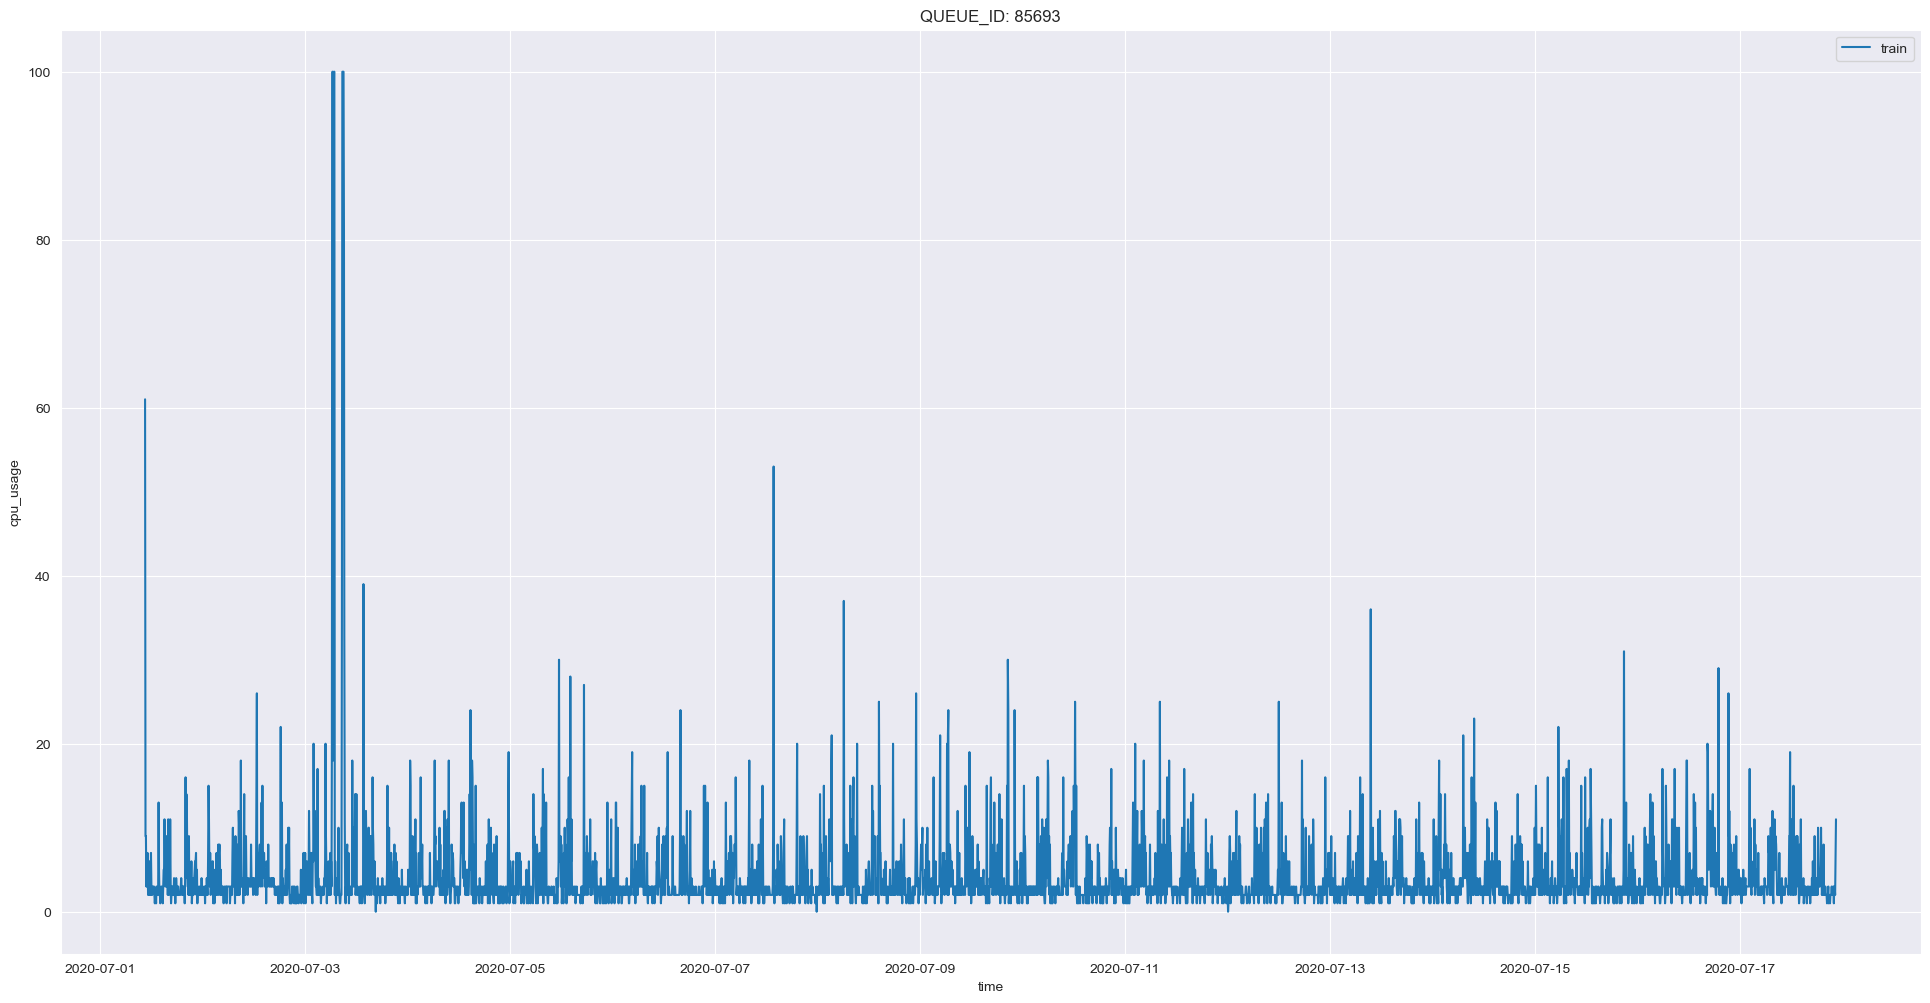

In [11]:
# 不同队列号的CPU占用率随时间变化
queues = [2, 3, 4, 27, 36, 291, 85153, 85693]
# 一周
time_range = 12 * 24 * 14
for i in range(len(queues)):
    queue_id = queues[i]
    queue_df = train_df[train_df.QUEUE_ID == queue_id]
    if i == 0:
        display(queue_df)
    # 处理时间
    for df in [queue_df]:
        t = pd.to_datetime(df['DOTTING_TIME'], unit='ms')
        df['DOTTING_TIME'] = t

    times = queue_df['DOTTING_TIME']

    plt.figure(figsize=(24, 12))
    plt.title('QUEUE_ID: {}'.format(queue_id))
    plt.ylabel('cpu_usage')
    plt.xlabel('time')
    plt.grid(True)
    plt.plot(times[:time_range], queue_df['CPU_USAGE'][:time_range], label='train')
    plt.legend()  # 显示图例
    plt.show()

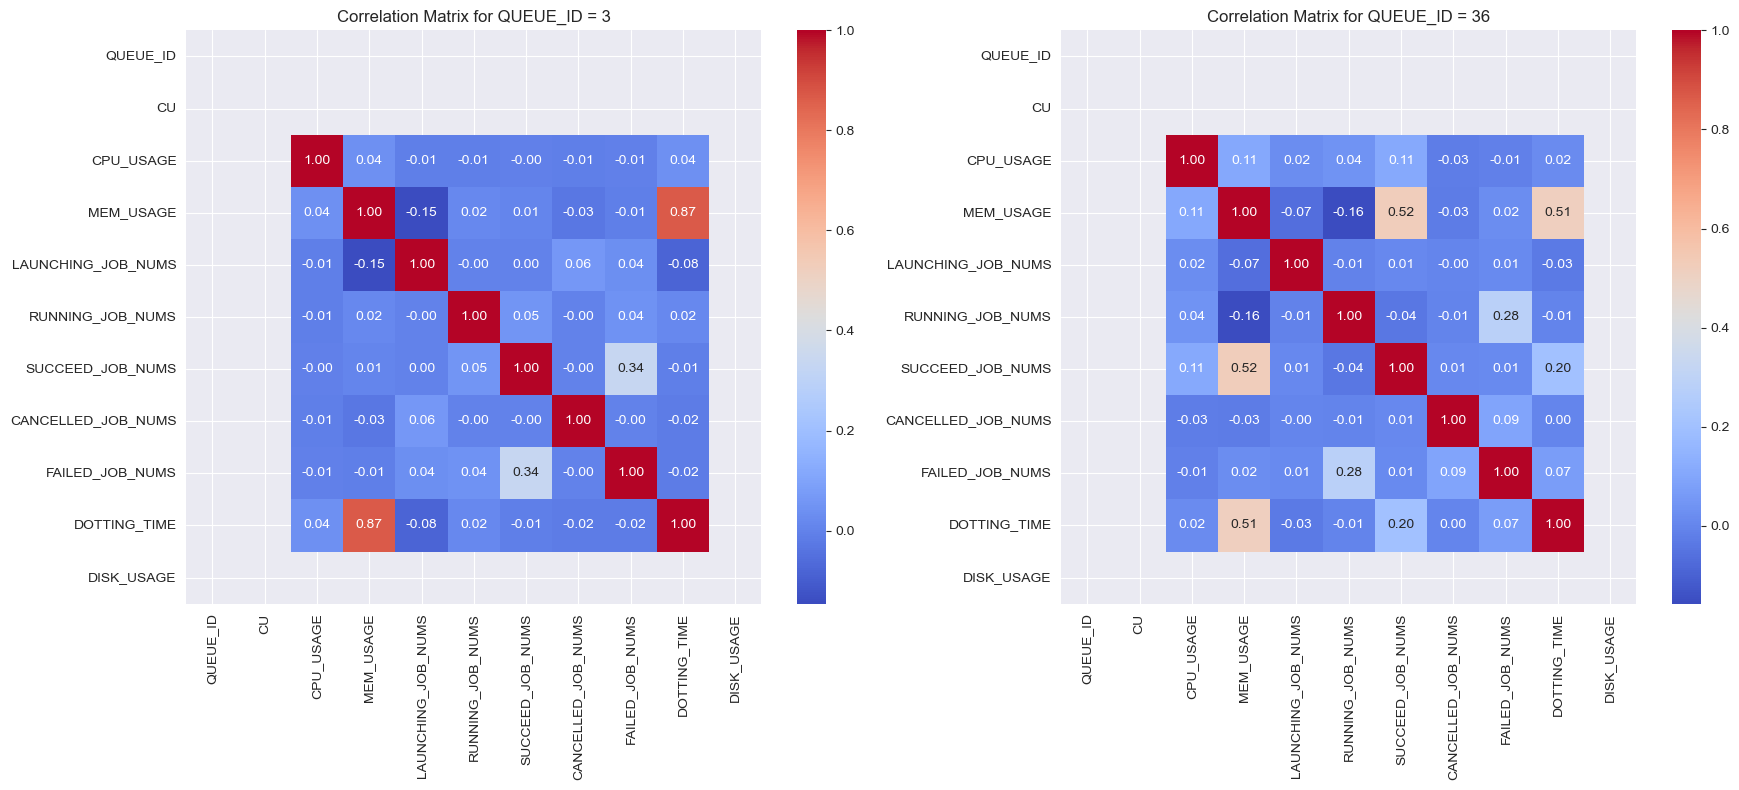

In [10]:
# 相关性分析
# Filtering the dataset for QUEUE_ID = 3 and QUEUE_ID = 36
data_queue_3 = train_df[train_df['QUEUE_ID'] == 3]
data_queue_36 = train_df[train_df['QUEUE_ID'] == 36]

# Calculating the correlation matrices
correlation_matrix_3 = data_queue_3.select_dtypes(include=['int64', 'float64']).corr()
correlation_matrix_36 = data_queue_36.select_dtypes(include=['int64', 'float64']).corr()

# Plotting the correlation matrices
plt.figure(figsize=(18, 8))

# Correlation matrix for QUEUE_ID = 3
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix_3, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix for QUEUE_ID = 3")

# Correlation matrix for QUEUE_ID = 36
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_36, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix for QUEUE_ID = 36")

plt.tight_layout()
plt.show()


In [9]:
# 计算 QUEUE_TYPE 列中不同值的数量
unique_values = train_df['QUEUE_TYPE'].unique()
print("QUEUE_TYPE 列中的不同值数量为:", unique_values)

unique_values = train_df['PLATFORM'].unique()
print("PLATFORM 列中的不同值数量为:", unique_values)

unique_values = train_df['RESOURCE_TYPE'].unique()
print("RESOURCE_TYPE 列中的不同值数量为:", unique_values)

unique_values = train_df['DISK_USAGE'].unique()
print("DISK_USAGE 列中的不同值数量为:", unique_values)

QUEUE_TYPE 列中的不同值数量为: ['sql' 'general' 'spark']
PLATFORM 列中的不同值数量为: ['x86_64' 'aarch64']
RESOURCE_TYPE 列中的不同值数量为: [nan 'vm' 'container']
DISK_USAGE 列中的不同值数量为: [nan  0. 17.  8.  9. 20. 23. 24. 25. 26. 27. 28. 29.  5.  2.  6.  7. 19.
 18.  4. 10. 21.]


In [ ]:
# 查看每个queue_id对应有多少数据
q_ids = train_df['QUEUE_ID'].value_counts().sort_index()
display(q_ids)
q_ids.to_csv('./data/serverless/q_ids.csv', encoding="utf-8", index=True)